In this part of work I will analyse the foolowing KPIs for Swedish population:

1. The proportion of total deaths to total intensive care patients **per region**:  
KPI: Death-to-ICU_Admissions Ratio  
Formula: (Total Deaths / Total Intensive Care Patients) * 100  
Interpretation: This KPI provides the percentage of individuals who succumbed to COVID-19 among those who required intensive care.

2. Gender-based impact of COVID-19:  
KPI: Gender Vulnerability Index  
Formula: (Number of Cases in Women / Total Number of Cases) * 100 vs (Number of Cases in Men / Total Number of Cases) * 100  
Interpretation: This KPI compares the percentage of COVID-19 cases in men and women, indicating which gender is more affected by the virus.

3. Age group most impacted by COVID-19:  
KPI: Age Group Vulnerability  
Formula: (Number of Cases in a Specific Age Group / Population of this Age Group) * 100  (compare among the age groups)
Interpretation: Identifies the age group most influenced by COVID-19.

4. Age group most vaccinated with 2 doses:  
KPI: Fully Vaccinated Age Group Ratio  
Formula: (Number of Individuals Fully Vaccinated (2 doses) in a Specific Age Group / Total Population of that Age Group) * 100  
Interpretation: Indicates the age group with the highest percentage of individuals fully vaccinated with two doses.

5. Percentage of people who hasn't completed the vaccination series:  
KPI: Vaccination Interruption Rate  
Formula: (Number of Individuals with the First Dose - Number of Individuals with Both Doses)/Number of Individuals with the First Dose * 100  
Interpretation: Measures the percentage of individuals who had started their vaccination serie yet not completed it.

In [1]:
import pandas as pd
import plotly_express as px

## Death-to-ICU_Admissions Ratio 

In [2]:
totals = pd.read_excel("./Data/Covid19.xlsx", sheet_name="Totalt antal per region")
totals.head()

,Region,Totalt_antal_fall,Fall_per_100000_inv,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,Blekinge,30829,19371.449951,85,184
1,Dalarna,75091,26098.780273,260,544
2,Gotland,11874,19776.671875,46,82
3,Gävleborg,74803,26020.503418,332,754
4,Halland,108822,32349.047119,229,518


A little bit unexpectably, the number of intensive care cases is less than the number of deaths (ratio is going to be > 100%), which means either that lots of people had died without getting intensive care or that only successful cases of intensive care are listed in this column. The official source provides the following comment:

" Antalet intensivvårdade laboratoriebekräftade fall hämtas löpande från Svenska Intensivvårdsregistrets rapporteringsmodul SIRI.
Viss fördröjning i rapportering och komplettering av uppgifter om nya fall, intensivvårdade fall och avlidna fall förekommer",

which is not pretty explanatory concerning our question.

In [3]:
death_to_icu = totals["Totalt_antal_avlidna"].sum() / totals["Totalt_antal_intensivvårdade"].sum()
death_to_icu

2.1646060352053644

In [4]:
totals ["Death to ICU_Admissions Ratio"] = totals["Totalt_antal_avlidna"] / totals["Totalt_antal_intensivvårdade"] * 100
display(totals)
pd.set_option("display.float_format", '{:.2f}'.format)

,Region,Totalt_antal_fall,Fall_per_100000_inv,Totalt_antal_intensivvårdade,Totalt_antal_avlidna,Death to ICU_Admissions Ratio
0,Blekinge,30829,19371.449951,85,184,216.470588
1,Dalarna,75091,26098.780273,260,544,209.230769
2,Gotland,11874,19776.671875,46,82,178.260870
3,Gävleborg,74803,26020.503418,332,754,227.108434
4,Halland,108822,32349.047119,229,518,226.200873
5,Jämtland Härjedalen,34347,26197.373535,95,197,207.368421
6,Jönköping,89662,24583.161133,414,756,182.608696
7,Kalmar,62810,25537.878418,135,385,285.185185
8,Kronoberg,51460,25460.141602,162,410,253.086420
9,Norrbotten,50755,20327.326904,267,459,171.910112


In [5]:
death_to_icu_fig = px.bar(totals, 
x = "Region",
y = ["Totalt_antal_intensivvårdade", "Totalt_antal_avlidna"],
title = "Death to ICU Admissions proportion",
labels = dict(value = "Number cases", variable = "Type of case"))
death_to_icu_fig.show()
death_to_icu_fig.write_html("./Visualizations/Insights/Death to ICU ratio.html")

## Gender Vulnerability Index  

In [6]:
genders = pd.read_excel("./Data/Covid19.xlsx", sheet_name="Totalt antal per kön")
genders.head()

,Kön,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,Man,1210098,6550,11279
1,Kvinna,1381189,2947,9273
2,Uppgift saknas,20293,47,107


In [7]:
from Functions import *

In [8]:
women = Gender(1, genders)
men = Gender(0, genders)

In [9]:
print(f"Procent of women cases, out of total = {women.procent_cases(men, 'Totalt_antal_fall')}")
print(f"Procent of men cases, out of total = {men.procent_cases(women, 'Totalt_antal_fall')}")

print(f"Procent of women intensive care cases, out of total intensive care cases = {women.procent_cases(men, 'Totalt_antal_intensivvårdade')}")
print(f"Procent of men intensive care cases, out of total intensive care cases = {men.procent_cases(women, 'Totalt_antal_intensivvårdade')}")

print(f"Procent of women deceased cases, out of total deceased = {women.procent_cases(men, 'Totalt_antal_avlidna')}")
print(f"Procent of men deceased cases, out of total deceased = {men.procent_cases(women, 'Totalt_antal_avlidna')}")

Procent of women cases, out of total = 53.3012746175935
Procent of men cases, out of total = 46.6987253824065
Procent of women intensive care cases, out of total intensive care cases = 31.030851847951986
Procent of men intensive care cases, out of total intensive care cases = 68.969148152048
Procent of women deceased cases, out of total deceased = 45.119696379914366
Procent of men deceased cases, out of total deceased = 54.880303620085634


As we can see, the number of women diagnosed COVID is a little bit higher; however, the number of men who died from COVID is higher, then the number of women, and the number of men admitted to the Intensive Care Unit is significantly higher.

In [10]:
from matplotlib import pyplot as plt

([<matplotlib.patches.Wedge at 0x24443bf8890>,
 [Text(-0.1582771398423213, 1.088553327588196, 'Man'),
  Text(0.14054468907761855, -1.0909845051017342, 'Kvinna'),
  Text(1.099854385904432, -0.017897759825880395, 'Uppgift saknas')],
 [Text(-0.0863329853685389, 0.5937563605026523, '55%'),
  Text(0.07666073949688285, -0.5950824573282185, '45%'),
  Text(0.5999205741296901, -0.009762414450480214, '1%')])

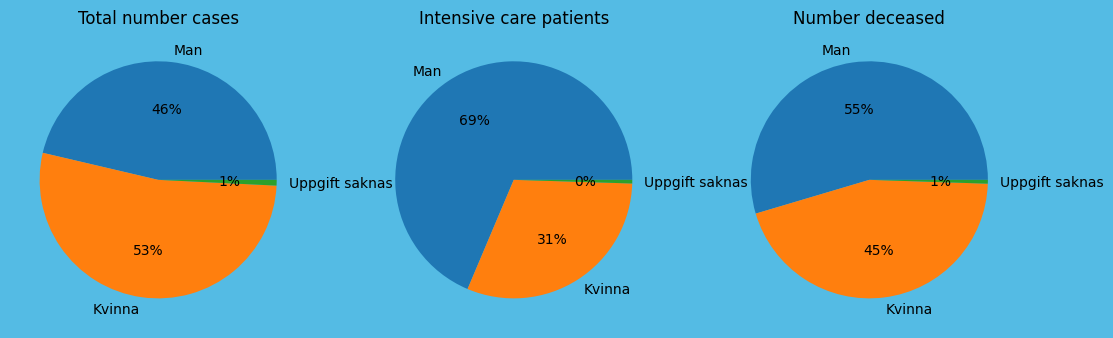

In [11]:
plt.figure(figsize = (13, 6), facecolor = '#54BBE4')

plt.subplot(1, 3, 1)
plt.title("Total number cases")
plt.pie(genders["Totalt_antal_fall"], labels = genders["Kön"], autopct="%0.0f%%")

plt.subplot(1, 3, 2)
plt.title("Intensive care patients")
plt.pie(genders["Totalt_antal_intensivvårdade"], labels = genders["Kön"], autopct="%0.0f%%")

plt.subplot(1, 3, 3)
plt.title("Number deceased")
plt.pie(genders["Totalt_antal_avlidna"], labels = genders["Kön"], autopct="%0.0f%%")

## Age Group Vulnerability  

There is no Age division I need for this task in the COVID-files, so I have imported the information about the age groups in Sweden from [here](https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101A/BefolkningNy/table/tableViewLayout1/).

In [12]:
population = pd.read_excel("./Data/Population.xlsx")
display(population)

,Age group,Population
0,0-9,1197522
1,10-19,1234678
2,20-29,1252142
3,30-39,1475316
4,40-49,1300726
5,50-59,1339203
6,60-69,1117832
7,70-79,1022050
8,80-89,480284
9,90-99,99376


In [13]:
cases_by_ages = pd.read_excel("./Data/Covid19.xlsx", sheet_name="Totalt antal per åldersgrupp")
display(cases_by_ages)

,Åldersgrupp,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,Ålder_0_9,138071,109,17
1,Ålder_10_19,355823,101,9
2,Ålder_20_29,418506,285,41
3,Ålder_30_39,493443,492,71
4,Ålder_40_49,474702,997,172
5,Ålder_50_59,378468,1932,523
6,Ålder_60_69,180079,2595,1422
7,Ålder_70_79,87096,2394,4654
8,Ålder_80_89,58170,612,8326
9,Ålder_90_plus,26677,21,5420


In [14]:
cases_by_ages["Population"] = population["Population"]
cases_by_ages

,Åldersgrupp,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna,Population
0,Ålder_0_9,138071,109,17,1197522
1,Ålder_10_19,355823,101,9,1234678
2,Ålder_20_29,418506,285,41,1252142
3,Ålder_30_39,493443,492,71,1475316
4,Ålder_40_49,474702,997,172,1300726
5,Ålder_50_59,378468,1932,523,1339203
6,Ålder_60_69,180079,2595,1422,1117832
7,Ålder_70_79,87096,2394,4654,1022050
8,Ålder_80_89,58170,612,8326,480284
9,Ålder_90_plus,26677,21,5420,99376


In [15]:
cases_by_ages.drop(axis = 0, index = 10, inplace = True)
cases_by_ages

,Åldersgrupp,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna,Population
0,Ålder_0_9,138071,109,17,1197522
1,Ålder_10_19,355823,101,9,1234678
2,Ålder_20_29,418506,285,41,1252142
3,Ålder_30_39,493443,492,71,1475316
4,Ålder_40_49,474702,997,172,1300726
5,Ålder_50_59,378468,1932,523,1339203
6,Ålder_60_69,180079,2595,1422,1117832
7,Ålder_70_79,87096,2394,4654,1022050
8,Ålder_80_89,58170,612,8326,480284
9,Ålder_90_plus,26677,21,5420,99376


In [16]:
cases_by_ages["AGV Total"] = cases_by_ages["Totalt_antal_fall"]/cases_by_ages["Population"]*100
cases_by_ages["AGV Intensive Care"] = cases_by_ages["Totalt_antal_intensivvårdade"]/cases_by_ages["Population"]*100
cases_by_ages["AGV Deceased"] = cases_by_ages["Totalt_antal_avlidna"]/cases_by_ages["Population"]*100
cases_by_ages["Åldersgrupp"] = population["Age group"]
cases_by_ages

,Åldersgrupp,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna,Population,AGV Total,AGV Intensive Care,AGV Deceased
0,0-9,138071,109,17,1197522,11.53,0.01,0.00
1,10-19,355823,101,9,1234678,28.82,0.01,0.00
2,20-29,418506,285,41,1252142,33.42,0.02,0.00
3,30-39,493443,492,71,1475316,33.45,0.03,0.00
4,40-49,474702,997,172,1300726,36.50,0.08,0.01
5,50-59,378468,1932,523,1339203,28.26,0.14,0.04
6,60-69,180079,2595,1422,1117832,16.11,0.23,0.13
7,70-79,87096,2394,4654,1022050,8.52,0.23,0.46
8,80-89,58170,612,8326,480284,12.11,0.13,1.73
9,90-99,26677,21,5420,99376,26.84,0.02,5.45


So, statistics shows, that the person is most likely to catch COVID19 if they are 40-49 years old, but the most typical intensive care patient is 60-79 years old. Also. the chances to survive after COVID decrease with age.

In [17]:
import seaborn as sns

<Axes: xlabel='Åldersgrupp', ylabel='AGV Deceased'>

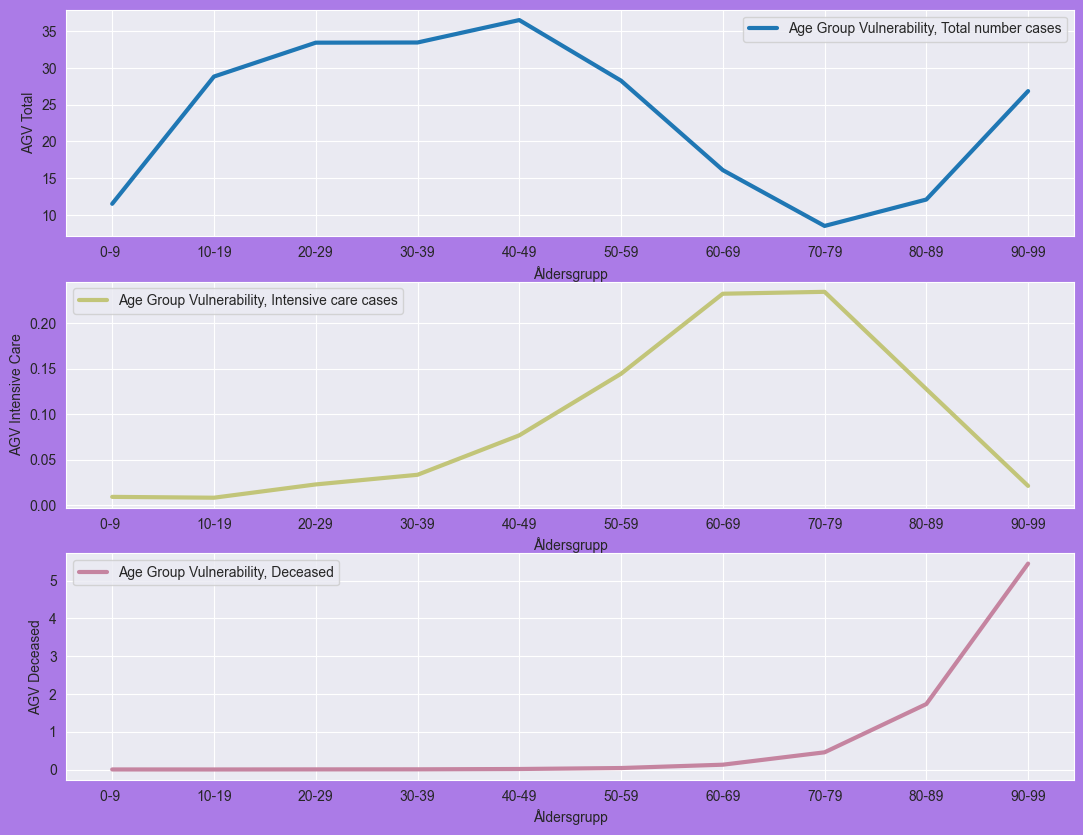

In [18]:
plt.figure(figsize = (13, 10), facecolor = '#AB7BE7')
sns.set_style('darkgrid')

plt.subplot(3, 1, 1)
sns.lineplot(x='Åldersgrupp', y = 'AGV Total', data = cases_by_ages, lw = 3, label = 'Age Group Vulnerability, Total number cases')

plt.subplot(3, 1, 2)
sns.lineplot(x='Åldersgrupp', y = 'AGV Intensive Care', data = cases_by_ages, 
lw = 3, color = '#C2C579',
label = 'Age Group Vulnerability, Intensive care cases')

plt.subplot(3, 1, 3)
sns.lineplot(x='Åldersgrupp', y = 'AGV Deceased', data = cases_by_ages, 
lw = 3, color = '#C584A0',
label = 'Age Group Vulnerability, Deceased')




## Fully_Vaccinated Age Group Ratio  

In [19]:
vaccindata = pd.read_excel('./Data/Covid19_Vaccine.xlsx', sheet_name = 'Vaccinerade kommun och ålder')
vaccindata.head(3)

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.50,0.43,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.70,0.63,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.00,NaN,0.73,0.67,0.29,NaN


In [20]:
ages_vaccinated = vaccindata.groupby('Ålder')['Andel minst 2 doser'].mean()*100
ages_vaccinated

Ålder
12-15            52.08
16-17            74.63
18-29            77.22
30-39            79.28
40-49            85.12
50-59            89.72
60-69            92.92
70-79            95.76
80-89            96.74
90 eller äldre   95.90
Name: Andel minst 2 doser, dtype: float64

As the eldest groups are most vulnerable, the procent of their full vaccination is highest, which shows the success of the vaccination campaign in Sweden.

In [21]:
fully_vac_fig = px.bar(ages_vaccinated, labels = dict(value = "% of the population", variable = ""))
fully_vac_fig.show()
fully_vac_fig.write_html("./Visualizations/Insights/Fully_vaccinated_ratio.html")

## Vaccination Interruption Rate

Finally, it might be important to understand the procent of people who started the vaccination process (1 dose), but for some reason haven't finished the full vaccination cycle (2 doses). 

In [22]:
vaccindata.head(1)

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.50,0.43,NaN,NaN


In [23]:
vaccindata['VIR'] = (vaccindata['Antal minst 1 dos'] - vaccindata['Antal minst 2 doser'])/vaccindata['Antal minst 1 dos']*100
vaccindata.sample(5)

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser,VIR
2694,24,Västerbottens län,2425,Dorotea,40-49,228,216,214,166.00,NaN,0.95,0.94,0.73,NaN,0.93
590,6,Jönköpings län,643,Habo,12-15,797,485,465,NaN,NaN,0.61,0.58,NaN,NaN,4.12
902,10,Blekinge län,1060,Olofström,18-29,1641,1254,1209,545.00,NaN,0.76,0.74,0.33,NaN,3.59
918,10,Blekinge län,1080,Karlskrona,80-89,3628,3552,3544,3490.00,3199.00,0.98,0.98,0.96,0.88,0.23
1455,14,Västra Götalands län,1440,Ale,50-59,4123,3738,3685,2922.00,NaN,0.91,0.89,0.71,NaN,1.42


In [24]:
vaccindata['VIR'].mean()

2.4063989266006094

As on average, 2 people out of 100 haven't completed their vaccination series.

In [25]:
vaccindata['VIR'].min()

0.0

In [26]:
most_disciplined = vaccindata.query("VIR == 0.0")
disciplined_groups = [most_disciplined['Ålder'].unique(), most_disciplined['Län_namn'].unique(), most_disciplined['Län_namn'].nunique()]
disciplined_groups

[array(['90 eller äldre', '80-89', '12-15', '70-79', '50-59', '16-17',
        '60-69'], dtype=object),
 array(['Stockholms län', 'Uppsala län', 'Södermanlands län',
        'Östergötlands län', 'Jönköpings län', 'Kronobergs län',
        'Kalmar län', 'Blekinge län', 'Skåne län', 'Hallands län',
        'Västra Götalands län', 'Värmlands län', 'Örebro län',
        'Västmanlands län', 'Dalarnas län', 'Gävleborgs län',
        'Västernorrlands län', 'Jämtlands län', 'Västerbottens län',
        'Norrbottens län'], dtype=object),
 20]

Population groups which were fully vaccinated with 2 doses if started live in 20/21 regions of Sweden and are aged 12-17 or 50+. It seems that the only region which is not in this list is the Gotlands län. And that the age group which tends to skip the next vaccination appointment is 18-50. But we have to check this further)

In [27]:
vaccindata['VIR'].max()

36.84210526315789

In [28]:
least_disciplined = vaccindata.query("VIR == 36.84210526315789")
least_disciplined

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser,VIR
2660,24,Västerbottens län,2418,Malå,12-15,143,76,48,NaN,NaN,0.53,0.34,NaN,NaN,36.84


No! My previous guess was not exactly correct:) Or maybe it's just a local anomaly in Malå.

It's time to see the whole picture.

In [29]:
vir_fig = px.scatter(vaccindata, 
           x='Län_namn', 
           y = 'VIR',
           color = 'Ålder',
           hover_name = 'Kommun_namn',
           hover_data = ['Län_namn', 'Befolkning', 'Ålder', 'VIR'],
           title = 'Vaccination Serie Interruption Rate'
           )

vir_fig.show()
vir_fig.write_html('./Visualizations/Insights/Vaccination Interruption Rate.html')

So, 12-15 years olds are pretty often at the top of the incompletion rate, while 90+ are definitely at the bottom of the graphs. While there is no VIR = 0 in Gotlands, it is visually the most disciplined region acoording to this KPI, together with Östergötlands län. The situation with 12-17 olds in Malå is definitely a local anomaly. No correlation between the size (number people living) of the municipality and VIR is found.